# Part 1: Regression in scikit-learn
1. Loading & exploring data
2. Model fitting 
    1. Entire data set
    2. Train vs Test split 
3. Other models for regression
4. Evaluating & comparing models
    1. Metrics
    2. Cross validation
---

## 1. Load data & visualise

In [1]:
# import data analysis library
import pandas as pd

In [2]:
# Read in data
df = pd.read_csv("http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv", index_col=0)

# show first five rows
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# data types for each column
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [4]:
# dataset dimensions
df.shape

(200, 4)

### Dataset overview
Consists of sales numbers for a particular product in 200 different markets, along with advertising budgets for 3 different media channels.

Input features/variables (advertising budgets):
- **TV** - 1000s of dollars
- **radio** - 1000s of dollars
- **newspaper** - 1000s of dollars

Output/repsonse variable:
- **sales** - 1000s of units

**Goal**: Predict sales given advertising budgets

In [5]:
# import library for plotting
import seaborn as sns

# allow plots to appear in notebook
%matplotlib inline

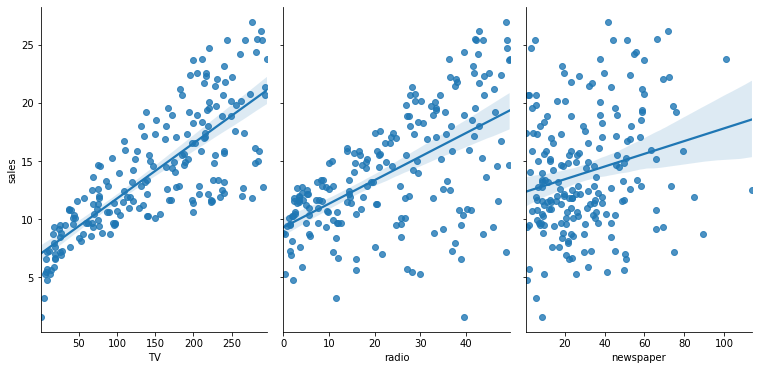

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=5, aspect=0.7, kind='reg')

---
## 2. Fit model
### Linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2  + \beta_3x_3$

- $y$ is the response (**sales**)
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (**TV**)
- $\beta_2$ is the coefficient for $x_2$ (**radio**)
- $\beta_3$ is the coefficient for $x_3$ (**newspaper**)

Therefore:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper$

In [7]:
# import necessary libraries
from sklearn.linear_model import LinearRegression  # general ML library
import statsmodels.formula.api as smf  # statistical modelling library - more user friendly ouptut (similar to R)

In [8]:
# list of input variables
x_cols = ['TV', 'radio', 'newspaper']

# use x_cols list to select subset from df
x = df[x_cols]

# print dimensions of x
print("X dimensions:", x.shape)

# display first 5 rows of x
x.head()

X dimensions: (200, 3)


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
# specify target/response variable y
y = df['sales']

# print dimensions of y
print(y.shape)

#display first 5 rows
y.head()

(200,)


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

### A. Fit on all observations

In [10]:
# Fit statsmodels version - similar syntax to R
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()

# display coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [11]:
# Fit scikit-learn version
lm2 = LinearRegression()
lm2.fit(x, y)

# print coefficients
print("Intercept:", lm2.intercept_)
dict(zip(x_cols, lm2.coef_))

Intercept: 2.938889369459412


{'TV': 0.0457646454553976,
 'radio': 0.18853001691820442,
 'newspaper': -0.0010374930424763285}

#### Fitted model on all observations:
$y = 2.938889 + 0.045765 \times TV + 0.188530 \times radio - 0.001037 \times newspaper$

#### Statsmodels summary

In [12]:
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        10:58:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Predicting with both modelling approaches

In [13]:
# Predicting with lm1
lm1.predict(x.iloc[:5])

1    20.523974
2    12.337855
3    12.307671
4    17.597830
5    13.188672
dtype: float64

In [14]:
# Predicting with lm2
lm2.predict(x.iloc[:5])

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186])

### B. Train vs Test split
---
How do we evaluate and compare multiple regression approaches to find the best suited model?
- Evaluate models on out-of-sample observations, i.e. observations not used at model fitting stage. 
- Randomly split the data between train and test samples
    - Fit models on train observations
    - Evaluate on test (out-of-sample) observations
- Compare RMSE on test set for each model - more reliable indicator of preformance
- Will use scikit-learn library exlcusively from here on out (contains other ML models for comparison)

In [15]:
import numpy as np  # library for mathematical computation
from sklearn.metrics import r2_score, mean_squared_error, make_scorer  # function to calculate MSE
from sklearn.model_selection import train_test_split  # Function to randomly split data between train & test

In [16]:
# split data into 80% train, 20% split randomly sampled
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=27)

In [17]:
# default split is 75% for training and 25% for testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


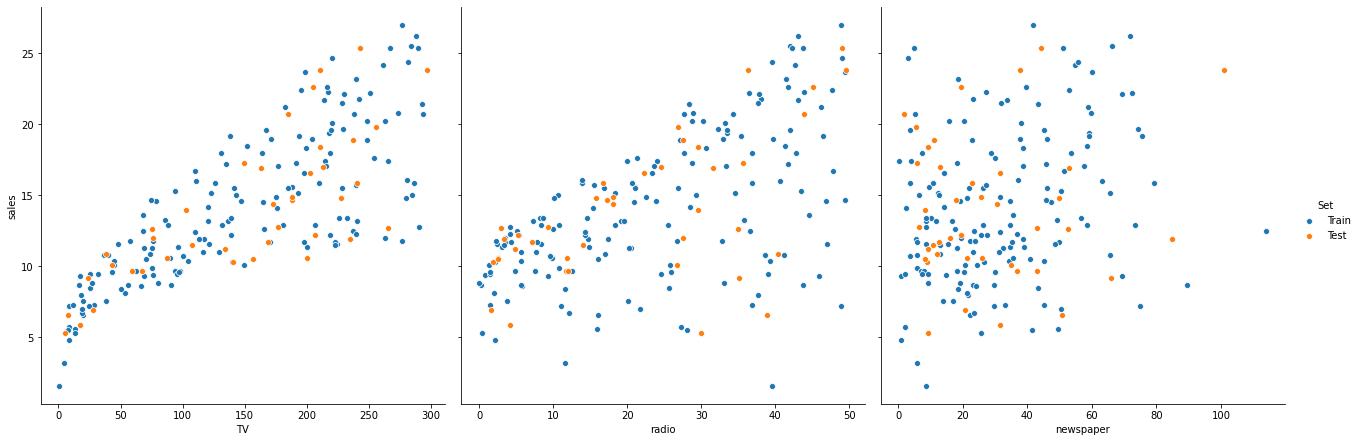

In [18]:
# plot train vs test split
x_1 = x_train.copy()
x_1['Set'] = 'Train'
x_2 = x_test.copy()
x_2['Set'] = 'Test'

# combine back together
plot_df = pd.concat([pd.concat([x_1, x_2]), pd.concat([y_train, y_test])], axis=1)
sns.pairplot(plot_df, x_vars=['TV','radio', 'newspaper'], y_vars='sales', hue='Set', height=6, aspect=1)

In [19]:
# Fit model om train
lm = LinearRegression()
lm.fit(x_train, y_train)

# R-square & RMSE train
print("R-Squared (train):", r2_score(y_train, lm.predict(x_train)))
print("RMSE (train):", np.sqrt(mean_squared_error(y_train, lm.predict(x_train))))
print("="*40)

# R-square & RMSE test
print("R-Squared (test):", r2_score(y_test, lm.predict(x_test)))
print("RMSE (test):", np.sqrt(mean_squared_error(y_test, lm.predict(x_test))))

R-Squared (train): 0.8947281937728894
RMSE (train): 1.7094679934884642
R-Squared (test): 0.9064360707520687
RMSE (test): 1.509772764601027


---
## 3. Other Models
- Linear Support vector regression
- Polynomial Support vector regression
- Gradient boosting regression

In [20]:
# import other regression models
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
# Fit linear SVR
lin_svr = SVR(kernel='linear', epsilon=.1, coef0=1)
lin_svr.fit(x_train, y_train)

# R-square & RMSE test
print("R-Squared (LinearSVR):", r2_score(y_test, lin_svr.predict(x_test)))
print("RMSE (LinearSVR):", np.sqrt(mean_squared_error(y_test, lin_svr.predict(x_test))))

R-Squared (LinearSVR): 0.9054730738111912
RMSE (LinearSVR): 1.51752246392084


In [22]:
# Fit polynomial SVR
poly_svr = SVR(kernel='poly', degree=2, epsilon=.1, coef0=1)
poly_svr.fit(x_train, y_train)

# R-square & RMSE test
print("R-Squared (PolySVR):", r2_score(y_test, poly_svr.predict(x_test)))
print("RMSE (PolySVR):", np.sqrt(mean_squared_error(y_test, poly_svr.predict(x_test))))

R-Squared (PolySVR): 0.9845989170172499
RMSE (PolySVR): 0.6125379365672433


In [23]:
# Fit SVR
gbm = GradientBoostingRegressor()
gbm.fit(x_train, y_train)

# R-square & RMSE test
print("R-Squared (GBM):", r2_score(y_test, gbm.predict(x_test)))
print("RMSE (GBM):", np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))))

R-Squared (GBM): 0.9821441890112764
RMSE (GBM): 0.6595491284873202


In [24]:
# evaluate all
print("R-Squared (Linear regression):\t", r2_score(y_test, lm.predict(x_test)))
print("RMSE (Linear regression):\t", np.sqrt(mean_squared_error(y_test, lm.predict(x_test))))
print("="*51)

print("R-Squared (LinearSVR):\t\t", r2_score(y_test, lin_svr.predict(x_test)))
print("RMSE (LinearSVR):\t\t", np.sqrt(mean_squared_error(y_test, lin_svr.predict(x_test))))
print("="*51)

print("R-Squared (PolySVR):\t\t", r2_score(y_test, poly_svr.predict(x_test)))
print("RMSE (PolySVR):\t\t\t", np.sqrt(mean_squared_error(y_test, poly_svr.predict(x_test))))
print("="*51)

print("R-Squared (GBM):\t\t", r2_score(y_test, gbm.predict(x_test)))
print("RMSE (GBM):\t\t\t", np.sqrt(mean_squared_error(y_test, gbm.predict(x_test))))

R-Squared (Linear regression):	 0.9064360707520687
RMSE (Linear regression):	 1.509772764601027
R-Squared (LinearSVR):		 0.9054730738111912
RMSE (LinearSVR):		 1.51752246392084
R-Squared (PolySVR):		 0.9845989170172499
RMSE (PolySVR):			 0.6125379365672433
R-Squared (GBM):		 0.9821441890112764
RMSE (GBM):			 0.6595491284873202


---
## 4. Evaluation & Model comparison
- Metrics
    - R-Squared & RMSE
- Cross-Validation
    - Extension of out-of-sample evaluation
    - Average performance of model over mutliple (k) random train-test splits
 
### Steps for K-fold cross-validation
1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.
    

Diagram of **5-fold cross-validation:**

![5-fold cross-validation](images/07_cross_validation_diagram.png)

[Source](https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb)

In [25]:
# import necessary functions
from sklearn.model_selection import cross_val_score

In [26]:
# linear regression
lm = LinearRegression()
lm_r2 = cross_val_score(lm, x, y, cv=10, scoring='r2').mean()
lm_rmse = cross_val_score(lm, x, y, cv=10, scoring="neg_root_mean_squared_error").mean()*-1

In [27]:
# linear SVR
lin_svr = SVR(kernel='linear', epsilon=.1, coef0=1)
lin_svr_r2 = cross_val_score(lin_svr, x, y, cv=10, scoring='r2').mean()
lin_svr_rmse = cross_val_score(lin_svr, x, y, cv=10, scoring="neg_root_mean_squared_error").mean()*-1

In [28]:
# Poly SVR
poly_svr = SVR(kernel='poly', degree=2, epsilon=.1, coef0=1)
poly_svr_r2 = cross_val_score(poly_svr, x, y, cv=10, scoring='r2').mean()
poly_svr_rmse = cross_val_score(poly_svr, x, y, cv=10, scoring="neg_root_mean_squared_error").mean()*-1

In [29]:
# linear regression
gbm = GradientBoostingRegressor()
gbm_r2 = cross_val_score(gbm, x, y, cv=10, scoring='r2').mean()
gbm_rmse = cross_val_score(gbm, x, y, cv=10, scoring="neg_root_mean_squared_error").mean()*-1

In [30]:
# Cross-validation results
print("Mean R-Squared (Linear regression):\t", lm_r2)
print("Mean RMSE (Linear regression):\t\t", lm_rmse)
print("="*59)

print("Mean R-Squared (LinearSVR):\t\t", lin_svr_r2)
print("Mean RMSE (LinearSVR):\t\t\t", lin_svr_rmse)
print("="*59)

print("Mean R-Squared (PolySVR):\t\t", poly_svr_r2)
print("Mean RMSE (PolySVR):\t\t\t", poly_svr_rmse)
print("="*59)

print("Mean R-Squared (GBM):\t\t\t", gbm_r2)
print("Mean RMSE (GBM):\t\t\t", gbm_rmse)

Mean R-Squared (Linear regression):	 0.8853562237979616
Mean RMSE (Linear regression):		 1.6913531708051797
Mean R-Squared (LinearSVR):		 0.8781934907475328
Mean RMSE (LinearSVR):			 1.7206112476159774
Mean R-Squared (PolySVR):		 0.9801976355346618
Mean RMSE (PolySVR):			 0.6618882998575366
Mean R-Squared (GBM):			 0.9810749997613455
Mean RMSE (GBM):			 0.6928552626679583
